In [1]:
import copy
import itertools
import numpy as np
class SGraph_FP:
    def __init__(self,p,c=1):
        #exemple of imput p=[['Pa','Pb','Va','Vb'],['Pb','Vb','Pa','Va']]
        #c is the capacity of each resouce. By default we assume the resources are mutex, but we can change this for each individual resource with a function
        self.dim=len(p)
        self.p=p
        self.c=c
        self.cap=dict()
        for i in range(self.dim):
            for j in range(len(p[i])):
                self.cap[(self.p[i][j][1])]=c
        global MemoryOfPath
        global number_Of_Elements_of_Pn_removed
        number_Of_Elements_of_Pn_removed=0
        MemoryOfPath=[] #used in recursive functions that need to know what coordenates they went.
            
    #-- alg 1 start --#        
    #-- change capacity of each resource before build graph with this function. By default every resource is a mutex --#    

    def changecap(self,resource,capacity):
        self.cap[resource]=capacity
        print(self.cap)
            
    #-- change capacity of each resource before build graph with this function. By default every resource is a mutex --#



    #-- constructs the vertices and locks the capacity of each resource. If you change the capacity this needs to be reruned --#
    #-- After executing this use .returnvertices() to observer the output --#

    def product(self,*args, repeat=1):
    #modified from https://docs.python.org/3/library/itertools.html to have a input list instead of lists (i.e. original input l1,l2,l3.... now [l1,l2,l3....])
        pools = [tuple(pool) for pool in args[0]] * repeat
        result = [[]]
        for pool in pools:
            result = [x+[y] for x in result for y in pool]
        for prod in result:
            yield list(prod)
    #this produces the product of the coordenates that are going to be the vertices of the graph


    def infograph(self):
        #We create a list such that we have the position of the vertice of a graph,the capacity of the resources and the resource that are being used
        self.res=copy.deepcopy(self.cap)
        self.coordinates=[]
        for i in range(len(self.p)):
            self.coordinates.append([k for k in range(len(self.p[i])+1)])
        for i in self.res:
            self.res[i]=0
            #Reset the values of the dictionary to 0. This because in the initial state the resource consumption is 0

        print(self.cap)
        print(self.res)
        #now we have enough to define the information need to generate the vertices of the graph


    def createvertice(self):
        self.vertices=[]
        for v in self.product(self.coordinates):
            self.vertices.append(v)
        self.init=self.vertices[0]
        self.end=self.vertices[-1]
            

    #-- After executing this use .returnvertices() to observer the output --#
    #-- constructs the vertices and locks the capacity of each resource. If you change the capacity this needs to be reruned --#
                
    
    #-- creates the full graph with python dictionaries use .returngraph() to observe the output after executing this function --#

                
    #now we have enough to creat the edges of the graph
    def CreateGraph(self):
        self.infograph()
        self.createvertice()
        print(self.vertices)
        edge=[]
        edges=[]
        for ed in range(len(self.vertices)):
            for i in range(len(self.p)):
                edg=copy.deepcopy(self.vertices[ed])
                resource=edg[i]
                edg[i]=edg[i]+1
                if edg[i]<len(self.p[i])+1:
                    #for vertice (i1,i2,...,in), we create k<=n valid connections that for position i we have [(i1,i2,.,ii,..,in), '__',(i1,i2,.,ii+1,..,in)]
                    edges.append([self.vertices[ed],self.p[i][resource],edg])
                else:
                    pass
        self.edges=edges

        newedges=dict()

        #We can now compress the information such that we have a dictionary where dict[vertice]=[valid conections]
        #with this we will be able to call the connections from the vertices, this will help later to prune the graph
        for ed in range(len(self.vertices)):
            newedges[f'{self.vertices[ed]}']=copy.deepcopy([])
            for i in range(len(self.edges)):
                tempedg=copy.deepcopy(self.edges[i])
                tempedg1=[tempedg[1],tempedg[2]]
                if self.vertices[ed]==self.edges[i][0]:
                    #for i(<=k valid connections) vertices that are being pointed by a fixed vertice we get dict[vertice]=[connection_1,...,connection_i-1,[edge, vertice that is being pointed to]]
                    newedges[f'{self.vertices[ed]}'].append(tempedg1)
                else:
                    pass
        #we have enough to build the graph, because for each vertice we know were to point to


        self.pointers=newedges
        self.fullPreCubical()

    #-- creates the full graph with python dictionaries use .returngraph() to observe the output after executing this function --#

    #-- simple alg for only full graph precubical --#
                    
    def fullPreCubical(self):
        dim=len(self.vertices[0])
        self.SPC=[]
        for n in range(dim-1):
            Pn=dim-n
            dictPn=dict()
            for i in range(len(self.vertices)):
                dictPn[f'{self.vertices[i]}']=[]
                for j in range(len(self.vertices)):
                    test1=[self.vertices[i][k]!=self.vertices[j][k] for k in range(dim)]
                    test2=[self.vertices[j][k]-self.vertices[i][k]==1 for k in range(dim)]
                    if sum(test1)==Pn and sum(test2)==Pn:
                        dictPn[f'{self.vertices[i]}'].append(self.vertices[j])
                    else:
                        pass
            self.SPC.append(dictPn)
        return self.SPC
        #to add P1 and P0 we can just fullPreCubical.append(self.pointers);fullPreCubical.append(self.vertices)
        #we dont do this because we want to visualiza P2...Pn with this set


    #-- alg 1 end --# 
    
    #-- alg 2&3 start --# 

    def singleRemoval(self,init_vertice,ElementOfPn,n=1):
        global number_Of_Elements_of_Pn_removed
        if n<len(ElementOfPn):
            nOfPn=-n+1
            n_plus_1_Of_Pn=-n
            for i in range(len(self.vertices)):
                test1=[ self.vertices[i][j]<=init_vertice[j]<=ElementOfPn[j] for j in range(len(ElementOfPn))]
                if sum(ElementOfPn)-sum(self.vertices[i])<n+2 and all(test1):
                    original_size=len(self.SPC[n_plus_1_Of_Pn][f'{self.vertices[i]}'])
                    for l in range(len(self.SPC[n_plus_1_Of_Pn][f'{self.vertices[i]}'])):
                        l=l-(original_size-len(self.SPC[n_plus_1_Of_Pn][f'{self.vertices[i]}']))
                        test2=[ ElementOfPn[j]<=self.SPC[n_plus_1_Of_Pn][f'{self.vertices[i]}'][l][j]  for j in range(len(ElementOfPn))]
                        if all(test2):
                            RemoveNext=copy.deepcopy(self.SPC[n_plus_1_Of_Pn][f'{self.vertices[i]}'][l])
                            if ElementOfPn in self.SPC[nOfPn][f'{init_vertice}']:
                                print(f'We are in {ElementOfPn} (P{n}) and remove {ElementOfPn} (P{n})')
                                self.SPC[nOfPn][f'{init_vertice}'].remove(ElementOfPn)
                                number_Of_Elements_of_Pn_removed=number_Of_Elements_of_Pn_removed+1
                            else:
                                pass
                            if self.SPC[n_plus_1_Of_Pn][f'{self.vertices[i]}'][l] in self.SPC[n_plus_1_Of_Pn][f'{self.vertices[i]}']:
                                print(f'we are in {init_vertice}:{ElementOfPn} (P{n}) and remove {self.vertices[i]}:{RemoveNext}  (P{n+1}) ')
                                self.SPC[n_plus_1_Of_Pn][f'{self.vertices[i]}'].remove(self.SPC[n_plus_1_Of_Pn][f'{self.vertices[i]}'][l])
                                number_Of_Elements_of_Pn_removed=number_Of_Elements_of_Pn_removed+1
                                self.singleRemoval(self.vertices[i],RemoveNext,n+1)
                            else:
                                pass
                        else:
                            pass
                else:
                    pass
            if ElementOfPn in self.SPC[nOfPn][f'{init_vertice}']:
                print(f'we are in {ElementOfPn} (P{n}) and remove {ElementOfPn} (P{n})')
                self.SPC[nOfPn][f'{init_vertice}'].remove(ElementOfPn)
                number_Of_Elements_of_Pn_removed=number_Of_Elements_of_Pn_removed+1
        else:
            pass

       
    def ResourceUpdater(self,string):
        #if P of resource x then +1 to resource utilization x
        #if V of resource x then -1 to resource utilization x
        if string[0]=='P':
            return [string[1],1]
        elif string[0]=='V':
            return [string[1],-1]
        else:
            print('error')

    def getdirection(self,vertice1,vertice2):
        for i in range(len(vertice1)):
            if vertice2[i]-vertice1[i]!=0:
                return i
            else:
                pass


    def Cap_vertices(self):
        self.capproblems=[]
        vertices=copy.deepcopy(self.vertices)
        #Here we create a python dictonary that stores the capacity of each resource and we will be able to individually change it, i.e., cv_a^p(v)
        self.Resourcetracker=dict()
        self.Resourcetracker[f'{vertices[0]}']=copy.deepcopy(self.res)
        for i in range(1,len(vertices)):
            for k in range(1,len(vertices[i])+1):
                if vertices[i][-k]-1>=0:
                    verticeteste=copy.deepcopy(vertices[i])
                    verticeteste[-k]=verticeteste[-k]-1
                    self.Resourcetracker[f'{vertices[i]}']=copy.deepcopy(self.Resourcetracker[f'{verticeteste}'])
                    for l in range(len(self.pointers[f'{verticeteste}'])):
                        if self.pointers[f'{verticeteste}'][l][1]==vertices[i]:
                            resource_info=self.ResourceUpdater(self.pointers[f'{verticeteste}'][l][0])
                            self.Resourcetracker[f'{vertices[i]}'][resource_info[0]]=self.Resourcetracker[f'{vertices[i]}'][resource_info[0]]+resource_info[1]
                            break
                        else:
                            pass
                    break


    def KeysToList(self,dictionary):
        keys=dictionary.keys()
        ListOfKeys=[list(keys)[i].strip('][').split(', ') for i in range(len(dictionary))]
        for i in range(len(ListOfKeys)):
            for j in range(len(ListOfKeys[0])):
                ListOfKeys[i][j]=int(ListOfKeys[i][j])
        return ListOfKeys
      
    def PrunedGraph_FP(self,halfpruned=False): #Warning do not run this twice!
        self.Forbidden_vertices=[]
        self.Cap_vertices()
        resources=list(self.cap.keys())
        for i in range(len(self.vertices)):
            test_vertice_cap=[self.Resourcetracker[f'{self.vertices[i]}'][resources[c]]<=self.cap[resources[c]] for c in range(len(self.cap))] #v in \check{V}
            if all(test_vertice_cap):
                    pass
            else:
                self.Forbidden_vertices.append(self.vertices[i])
                edges_to_remove=[]
                for e in range(len(self.pointers[f'{self.vertices[i]}'])):
                    edges_to_remove.append(self.pointers[f'{self.vertices[i]}'][e][1])
                del self.pointers[f'{self.vertices[i]}']
                for e in range(len(edges_to_remove)):

                    self.singleRemoval(self.vertices[i],edges_to_remove[e])

        #This removes edges that point to removed vertices.
        if not halfpruned:
            Point_keys=list(self.pointers.keys())
            Point_ver=self.KeysToList(self.pointers)
            keys_removed=0
            for i in range(len(Point_keys)):
                edge_removed=0
                i-keys_removed
                for j in range(len(self.pointers[Point_keys[i]])):
                    j=j-edge_removed
                    if self.pointers[Point_keys[i]][j][1] in Point_ver:
                        pass
                    else:
                        self.singleRemoval(Point_ver[i],self.pointers[Point_keys[i]][j][1])
                        self.pointers[Point_keys[i]].remove(self.pointers[Point_keys[i]][j])
                        keys_removed+=1
                        edge_removed+=1
        else:
            pass
        print(f'number of elements removed {number_Of_Elements_of_Pn_removed}')   
        
    #-- alg 2&3 end --#    
        
    #-- alg 4 start --#
    def alg4(self,v,w,i,a): #d_i^a([v,w])
        c1=0
        c2=0
        while c1!=i:
            c2+=1
            if w[c1+c2]!=v[c1+c2]:
                c1+=1
        if a==0:
            w[c2]=v[c2]
        else:
            v[c2]=w[c2]
        return [v,w]
    #-- alg 4 end --# 
    
    #-- alg 7 start --#   
    
    #-- W_delta_plus --# 
    def Delta_plus(self,dictionary):
        listofvalues=[]
        Values=list(dictionary.values())
        for i in range(len(Values)):
            for j in range(len(Values[i])):
                if Values[i][j][1] not in listofvalues:
                    listofvalues.append(Values[i][j][1])    
        return listofvalues
    
    #-- W_delta_minus --#
    def Delta_minus(self,dictionary):
        keys=dictionary.keys()
        ListOfKeys=[list(keys)[i].strip('][').split(', ') for i in range(len(dictionary))]
        for i in range(len(ListOfKeys)):
            for j in range(len(ListOfKeys[0])):
                ListOfKeys[i][j]=int(ListOfKeys[i][j])
        for x in ListOfKeys:
            if len(self.pointers[f'{x}'])==0:
                ListOfKeys.remove(x)
        return ListOfKeys
    
    def alg7(self):
        V_delta_plus=self.Delta_plus(self.pointers)
        V_delta_minus=self.Delta_minus(self.pointers)
        DV_check=self.KeysToList(self.pointers)
        for x in V_delta_plus:
            if x not in DV_check:
                DV_check.append(x)
        UV_check=copy.deepcopy(DV_check)

        s_p=self.vertices[0]
        t_p=self.vertices[-1]
        
        self.forbidenD=[]
        self.forbidenU=[]
        
        D=[x for x in DV_check if (x!=t_p and x not in V_delta_minus)]
        U=[x for x in UV_check if (x!=s_p and x not in V_delta_plus)]
        
        for d in D:
            self.forbidenD.append(d)
            
        for u in U:
            self.forbidenU.append(u) 

        DG=copy.deepcopy(self.pointers)
        UG=copy.deepcopy(self.pointers)

        while len(D)!=0:
            for vertices in D:
                del DG[f'{vertices}']
            V_delta_minus=self.Delta_minus(DG)
            DV_check=self.KeysToList(DG)
            D=[x for x in DV_check if (x!=t_p and x not in V_delta_minus)]
            for d in D:
                self.forbidenD.append(d)

        while len(U)!=0:
            for vertices in U:
                del UG[f'{vertices}']
            V_delta_plus=self.Delta_plus(UG)
            UV_check=self.KeysToList(UG)
            U=[x for x in UV_check if (x!=s_p and x not in V_delta_plus)]
            for u in U:
                self.forbidenU.append(u) 
        self.DG=DG
        self.UG=UG
        for v in self.Forbidden_vertices:
            self.forbidenD.append(v)
        for v in self.Forbidden_vertices:
            self.forbidenU.append(v)
            
        return [DG,UG]

    #-- alg 7 end --#  


    def returnvertices(self):
        return self.vertices

    def returnFvertices(self):
        return self.Forbidden_vertices
    
    def returnDFvertices(self):
        return self.forbidenD
    
    def returnUFvertices(self):
        return self.forbidenU
    
    def returnedges(self):
        return self.edges

    def returngraph(self):
        return self.pointers

    def returncap(self):
        return self.cap

    def returnDG(self):
        return self.DG

    def returnDG(self):
        return self.UG

    def returnfullPreCubical(self):
        return self.SPC       

    def GE_info(self,halfpruned=False):
        self.CreateGraph()
        self.fullPreCubical()
        self.PrunedGraph_FP(halfpruned)
        #appends P0 and P1 to P
        self.SPC.append(self.pointers)
        self.SPC.append(self.vertices)
        return self.SPC
        

In [2]:
G=SGraph_FP([['Pa','Pb','Vb','Va'],['Pb','Pa','Va','Vb']])

We start by showing how resource function inside this class with some examples.
By default the class supposes that every resource has capacity 1, i.e., the resource is a mutex, to change this we have a method "changecap()" 
where we can define the capacity for each resource. This must be done before creating the graph.

In [3]:
print(f'As stated before this {G.returncap()} is the default capacities for the program  p=[["Pa","Pb","Vb","Va"],["Pb","Pa","Va","Vb"]]')
print('We can easely change the resources with the .changecap() and we get the updated dictonary')
G.changecap('a',2)
G.changecap('a',1)

As stated before this {'a': 1, 'b': 1} is the default capacities for the program  p=[["Pa","Pb","Vb","Va"],["Pb","Pa","Va","Vb"]]
We can easely change the resources with the .changecap() and we get the updated dictonary
{'a': 2, 'b': 1}
{'a': 1, 'b': 1}


To create the coordinates of the graph, i.e. for this example $(0,0), (1,0),\dots, (4,4)$ we need a few steps.
We start by sourcing from https://docs.python.org/3/library/itertools.html the function "product" that outputs the "cartesian product" with a modification, that changes the input function to take a lists of integers inside a list.
We convert **['Pa','Pb','Va','Vb'],['Pb','Vb','Pa','Va']** to **[[0, 1, 2, 3, 4],[0, 1, 2, 3, 4]]** input to "product" and we get $V$ of $G_p$.

In [4]:
example_list=[] 
for v in G.product([[0, 1, 2, 3, 4],[0, 1, 2, 3, 4]]):
    example_list.append(v)
print(example_list)

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4]]


For the convertion we create a simple loop, that gives vertices of each sequence

In [5]:
for i in range(len([['Pa','Pb','Vb','Va'],['Pb','Pa','Va','Vb']])):
                print([k for k in range(len([['Pa','Pb','Vb','Va'],['Pb','Pa','Va','Vb']][i])+1)])
        
coordinates=[]
for i in range(len([['Pa','Pb','Vb','Va'],['Pb','Pa','Va','Vb']])):
    coordinates.append([k for k in range(len([['Pa','Pb','Vb','Va'],['Pb','Pa','Va','Vb']][i])+1)])

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


The graph is going to be a dictonary where each key is a the initial vertice of an edge and the results are the possible final vertices and the correponding labels.

for example a given program **['Pa','Pb','Va','Vb'],['Pb','Vb','Pa','Va']**
the initial vertice **[0,0]** has the final vertices **[1,0]** and **[0,1]** with the labels **'Pa'** and **'Pb'**, respectively.

The algorithm can be sum up with a simple example, 
given a vertice **[i,j]** of **['Pa','Pb','Va','Vb'],['Pb','Vb','Pa','Va']**

if $i+1\leq4$ then
there exists the connection between **[i,j]** and **[i+1,j]** and the label is the $i$th (in python indexing) element of  **['Pa','Pb','Va','Vb']**
if $j+1\leq4$ then 
there exists the connection between **[i,j]** and **[i,j+1]** and the label is the $j$th element of  **['Pb','Vb','Pa','Va']** 

and we continue for the number of dimention, in this case is only 2.

example **[2,1]**

$2+1\leq4$ therefor, 

here exists the connection between **[2,1]** and **[3,1]** and the label is $'Va'$

$1+1\leq4$ therefor, 

here exists the connection between **[2,1]** and **[2,2]** and the label is $'Vb'$

In [6]:
%%capture
G.CreateGraph()

In [7]:
G.returngraph()

{'[0, 0]': [['Pa', [1, 0]], ['Pb', [0, 1]]],
 '[0, 1]': [['Pa', [1, 1]], ['Pa', [0, 2]]],
 '[0, 2]': [['Pa', [1, 2]], ['Va', [0, 3]]],
 '[0, 3]': [['Pa', [1, 3]], ['Vb', [0, 4]]],
 '[0, 4]': [['Pa', [1, 4]]],
 '[1, 0]': [['Pb', [2, 0]], ['Pb', [1, 1]]],
 '[1, 1]': [['Pb', [2, 1]], ['Pa', [1, 2]]],
 '[1, 2]': [['Pb', [2, 2]], ['Va', [1, 3]]],
 '[1, 3]': [['Pb', [2, 3]], ['Vb', [1, 4]]],
 '[1, 4]': [['Pb', [2, 4]]],
 '[2, 0]': [['Vb', [3, 0]], ['Pb', [2, 1]]],
 '[2, 1]': [['Vb', [3, 1]], ['Pa', [2, 2]]],
 '[2, 2]': [['Vb', [3, 2]], ['Va', [2, 3]]],
 '[2, 3]': [['Vb', [3, 3]], ['Vb', [2, 4]]],
 '[2, 4]': [['Vb', [3, 4]]],
 '[3, 0]': [['Va', [4, 0]], ['Pb', [3, 1]]],
 '[3, 1]': [['Va', [4, 1]], ['Pa', [3, 2]]],
 '[3, 2]': [['Va', [4, 2]], ['Va', [3, 3]]],
 '[3, 3]': [['Va', [4, 3]], ['Vb', [3, 4]]],
 '[3, 4]': [['Va', [4, 4]]],
 '[4, 0]': [['Pb', [4, 1]]],
 '[4, 1]': [['Pa', [4, 2]]],
 '[4, 2]': [['Va', [4, 3]]],
 '[4, 3]': [['Vb', [4, 4]]],
 '[4, 4]': []}

At the end of "CreateGraph()" we invoke "fullPreCubical()" a method that creates the "fullprecubical()" set using $T^n$ and $H^n$. Technically it is the set with $\square(G_p)_2,\dots,\square(G_p)_n$, but as we know the information of $\square(G_p)_0$ and $\square(G_p)_1$ exists already in the graph so to conserve space we don't include them in this set. We can read the key of the dictionary as the initial vertice and the values as the final vertice of a precubical block. For example if we have $'[1,1]':[[2,2]]$ this corresponds to $[\![ 1,2 ]\!] \otimes [\![ 1,2 ]\!]$.

In [8]:
G.returnfullPreCubical()

[{'[0, 0]': [[1, 1]],
  '[0, 1]': [[1, 2]],
  '[0, 2]': [[1, 3]],
  '[0, 3]': [[1, 4]],
  '[0, 4]': [],
  '[1, 0]': [[2, 1]],
  '[1, 1]': [[2, 2]],
  '[1, 2]': [[2, 3]],
  '[1, 3]': [[2, 4]],
  '[1, 4]': [],
  '[2, 0]': [[3, 1]],
  '[2, 1]': [[3, 2]],
  '[2, 2]': [[3, 3]],
  '[2, 3]': [[3, 4]],
  '[2, 4]': [],
  '[3, 0]': [[4, 1]],
  '[3, 1]': [[4, 2]],
  '[3, 2]': [[4, 3]],
  '[3, 3]': [[4, 4]],
  '[3, 4]': [],
  '[4, 0]': [],
  '[4, 1]': [],
  '[4, 2]': [],
  '[4, 3]': [],
  '[4, 4]': []}]

At this point we $G_p$ and $\square(G_p)$.

The method "Cap_vertices()" assigns the resources to each vertice. The method "PrunedGraph_FP()" will cover Algorithm 2 and 3. This is the only method that diverges significatively from theoretical verson. First, we don't have $\bar{V}$, we loop over all vertices and test if $v \in \bar{V}$ during the execution and create the list that corresponds to $\bar{V}$. Additionally, this method has a structure that can be applied to more general precubical sets, i.e., the algorithm checks if a element of $[v_1]:[w_1]=x\in P_i$ is a face of $[v_2]:[w_2]=y \in P_{i+1}$ $(x=d^\alpha_i(y))$, in the specific case of this precubical set the check is equivalent to $v_2\leq v_1\leq w_1 \leq w_2$. 

In [9]:
G.PrunedGraph_FP()
G.returnfullPreCubical()

we are in [1, 2]:[2, 2] (P1) and remove [1, 1]:[2, 2]  (P2) 
we are in [1, 2]:[2, 2] (P1) and remove [1, 2]:[2, 3]  (P2) 
we are in [1, 2]:[1, 3] (P1) and remove [0, 2]:[1, 3]  (P2) 
we are in [2, 1]:[3, 1] (P1) and remove [2, 0]:[3, 1]  (P2) 
we are in [2, 1]:[3, 1] (P1) and remove [2, 1]:[3, 2]  (P2) 
we are in [2, 2]:[3, 2] (P1) and remove [2, 2]:[3, 3]  (P2) 
we are in [2, 3]:[3, 3] (P1) and remove [2, 3]:[3, 4]  (P2) 
we are in [2, 3]:[2, 4] (P1) and remove [1, 3]:[2, 4]  (P2) 
we are in [3, 2]:[4, 2] (P1) and remove [3, 1]:[4, 2]  (P2) 
we are in [3, 2]:[4, 2] (P1) and remove [3, 2]:[4, 3]  (P2) 
we are in [0, 2]:[1, 2] (P1) and remove [0, 1]:[1, 2]  (P2) 
we are in [1, 1]:[2, 1] (P1) and remove [1, 0]:[2, 1]  (P2) 
number of elements removed 12


[{'[0, 0]': [[1, 1]],
  '[0, 1]': [],
  '[0, 2]': [],
  '[0, 3]': [[1, 4]],
  '[0, 4]': [],
  '[1, 0]': [],
  '[1, 1]': [],
  '[1, 2]': [],
  '[1, 3]': [],
  '[1, 4]': [],
  '[2, 0]': [],
  '[2, 1]': [],
  '[2, 2]': [],
  '[2, 3]': [],
  '[2, 4]': [],
  '[3, 0]': [[4, 1]],
  '[3, 1]': [],
  '[3, 2]': [],
  '[3, 3]': [[4, 4]],
  '[3, 4]': [],
  '[4, 0]': [],
  '[4, 1]': [],
  '[4, 2]': [],
  '[4, 3]': [],
  '[4, 4]': []}]

In [10]:
G.returngraph()

{'[0, 0]': [['Pa', [1, 0]], ['Pb', [0, 1]]],
 '[0, 1]': [['Pa', [1, 1]], ['Pa', [0, 2]]],
 '[0, 2]': [['Va', [0, 3]]],
 '[0, 3]': [['Pa', [1, 3]], ['Vb', [0, 4]]],
 '[0, 4]': [['Pa', [1, 4]]],
 '[1, 0]': [['Pb', [2, 0]], ['Pb', [1, 1]]],
 '[1, 1]': [],
 '[1, 3]': [['Vb', [1, 4]]],
 '[1, 4]': [['Pb', [2, 4]]],
 '[2, 0]': [['Vb', [3, 0]]],
 '[2, 4]': [['Vb', [3, 4]]],
 '[3, 0]': [['Va', [4, 0]], ['Pb', [3, 1]]],
 '[3, 1]': [['Va', [4, 1]]],
 '[3, 3]': [['Va', [4, 3]], ['Vb', [3, 4]]],
 '[3, 4]': [['Va', [4, 4]]],
 '[4, 0]': [['Pb', [4, 1]]],
 '[4, 1]': [['Pa', [4, 2]]],
 '[4, 2]': [['Va', [4, 3]]],
 '[4, 3]': [['Vb', [4, 4]]],
 '[4, 4]': []}

The algorithm 4 and 7 are almost identical to the theoretical version, so we just show some examples.

In [11]:
G.alg4([1,1,1],[2,1,2],0,1) #alg4(v,w,i,a), d_j^a([v,w]) with python indexing, i.e., j=i-1 with i from definition d_i^a.

[[2, 1, 1], [2, 1, 2]]

In [12]:
G.alg7()

[{'[0, 0]': [['Pa', [1, 0]], ['Pb', [0, 1]]],
  '[0, 1]': [['Pa', [1, 1]], ['Pa', [0, 2]]],
  '[0, 2]': [['Va', [0, 3]]],
  '[0, 3]': [['Pa', [1, 3]], ['Vb', [0, 4]]],
  '[0, 4]': [['Pa', [1, 4]]],
  '[1, 0]': [['Pb', [2, 0]], ['Pb', [1, 1]]],
  '[1, 3]': [['Vb', [1, 4]]],
  '[1, 4]': [['Pb', [2, 4]]],
  '[2, 0]': [['Vb', [3, 0]]],
  '[2, 4]': [['Vb', [3, 4]]],
  '[3, 0]': [['Va', [4, 0]], ['Pb', [3, 1]]],
  '[3, 1]': [['Va', [4, 1]]],
  '[3, 3]': [['Va', [4, 3]], ['Vb', [3, 4]]],
  '[3, 4]': [['Va', [4, 4]]],
  '[4, 0]': [['Pb', [4, 1]]],
  '[4, 1]': [['Pa', [4, 2]]],
  '[4, 2]': [['Va', [4, 3]]],
  '[4, 3]': [['Vb', [4, 4]]],
  '[4, 4]': []},
 {'[0, 0]': [['Pa', [1, 0]], ['Pb', [0, 1]]],
  '[0, 1]': [['Pa', [1, 1]], ['Pa', [0, 2]]],
  '[0, 2]': [['Va', [0, 3]]],
  '[0, 3]': [['Pa', [1, 3]], ['Vb', [0, 4]]],
  '[0, 4]': [['Pa', [1, 4]]],
  '[1, 0]': [['Pb', [2, 0]], ['Pb', [1, 1]]],
  '[1, 1]': [],
  '[1, 3]': [['Vb', [1, 4]]],
  '[1, 4]': [['Pb', [2, 4]]],
  '[2, 0]': [['Vb', [3, 0]]

In [13]:
import copy
import itertools
class GeometricRealization:
    def __init__(self,PrecubicalSet):
        #exemple of imput P=[P0,P1,...,Pn]
        self.dim=len(PrecubicalSet)
        self.vertices=PrecubicalSet[-1]
        self.pointers=PrecubicalSet[-2]
        PrecubicalSet.remove(self.vertices)
        PrecubicalSet.remove(self.pointers)
        self.PrecubicalSet=PrecubicalSet
        #eliminates vertices in the precubical set that are not relevant for P2,...,Pn
        for n in range(len(self.PrecubicalSet)):
            Pn=self.PrecubicalSet[-1-n]
            for i in range(len(self.vertices)):
                if len(Pn[f'{self.vertices[i]}'])==0:
                    del Pn[f'{self.vertices[i]}']
                else: 
                    pass
        for i in range(len(self.vertices)):
            try:
                for j in range(len(self.pointers[f'{self.vertices[i]}'])):
                    self.pointers[f'{self.vertices[i]}'][j]=self.pointers[f'{self.vertices[i]}'][j][1]
            except:
                pass

        print('')
        print(self.pointers)
        print('')
        self.PrecubicalSet.append(self.pointers)
        self.SetInR=[]
        self.processed=copy.deepcopy(self.PrecubicalSet)
        self.processed.reverse()

    def KeysToList(self,dictionary):
        keys=dictionary.keys()
        ListOfKeys=[list(keys)[i].strip('][').split(', ') for i in range(len(dictionary))]
        for i in range(len(ListOfKeys)):
            for j in range(len(ListOfKeys[0])):
                ListOfKeys[i][j]=int(ListOfKeys[i][j])
        return ListOfKeys


    def axis(self):
        Min=dict()
        Max=dict()
        for i in range(len(self.vertices[0])):
            Min[f'x{i}']=self.vertices[0][i]
            Max[f'x{i}']=self.vertices[-1][i]
    
    #-- alg 5 start --# 


    def createIntervals(self,IV,n,ele):
        if n==0:
            for j in range(len(self.PrecubicalSet[n][f'{IV}'])):
                EP=[[IV[k],self.PrecubicalSet[n][f'{IV}'][j][k]] for k in range(len(IV))]
                ele.append(EP)
            return ele
        else:
            for j in range(len(self.PrecubicalSet[n][f'{IV}'])):
                EP=[[IV[k],self.PrecubicalSet[n][f'{IV}'][j][k]] for k in range(len(IV))]
                a=True
                while a:
                    print(self.SetInR[n-1])
                    for i in range(len(self.SetInR[n-1])):
                        test=[self.inInterval(EP[k],self.SetInR[n-1][i][k]) for k in range(len(EP))]
                        if all(test):
                            #ele de Pn in Pn+1
                            a=False
                            continue
                        else:
                            pass
                    if a==False:
                        pass
                    else:
                        ele.append(EP)
                        a=False


        return ele

    def inInterval(self,interval1,interval2):
        if interval2[0]<=interval1[0]<=interval1[1]<=interval2[1]:
            return True
        else:
            return False


    def inInterval(self,interval1,interval2):
        if interval2[0]<=interval1[0]<=interval1[1]<=interval2[1]:
            return True
        else:
            return False

    def geometricrealization(self):
        #we start by compressing Pn to be equivalent to the union of intervals in a product topology
        #its easier to do it in the precubical set then with atual intervals in python
        for n in range(len(self.PrecubicalSet)):
            Pnkeys=list(self.PrecubicalSet[n].keys())
            Pnkeyslist=self.KeysToList(self.PrecubicalSet[n])
            elePn=[]
            for i in range(len(Pnkeys)):
                elePn=self.createIntervals(Pnkeyslist[i],n,elePn)
            self.SetInR.append(elePn)

        for l in range(len(self.SetInR)):
            if self.SetInR[l] is None or len(self.SetInR[l])==0:
                self.SetInR[l]=f'P{l} Merged with another Pi'
            else: 
                pass


        return self.SetInR
    #-- alg 5 end --# 
    
    
    #-- alg 6 start --#  
    def VerinInter(self,V,I):
        Lb=I[0]
        Ub=I[1]
        n=len(Lb)
        for v in V:
            if all([Lb[j]<=v[j]<=Ub[j] for j in range(n)]):
                return True
            else:
                pass
        return False

    def Inbounds(self,I_bounded):
        Lb=I_bounded[0]
        Ub=I_bounded[1]
        n=len(Lb)
        if all([Lb[j]<=Ub[j] for j in range(n)]):
            return True
        else:
            pass
        return False

    def alg6(self,V): #li=[len(p_1),...,len(p_n)], V vertices we want to remove
        li=self.vertices[-1]
        n=len(li)
        G_1=[0 for i in range(n)]
        G_2=[li[i] for i in range(n)]
        set_Gamma=[[G_1,G_2]]
        setClean_Gamma=[]
        while len(V)!=0: 
            v=V[0]
            r=0
            for i in range(len(set_Gamma)):
                x=copy.deepcopy(set_Gamma[i-r])
                Lb=x[0]
                Ub=x[1]
                if all([Lb[j]<=v[j]<=Ub[j] for j in range(n)]):
                    set_Gamma.remove(x)
                    r+=1
                    for k in range(n):
                        splits=[]
                        split_1=copy.deepcopy(x)
                        split_2=copy.deepcopy(x)
                        split_1[1][k]=v[k]-1
                        split_2[0][k]=v[k]+1
                        if self.Inbounds(split_1):
                            splits.append(split_1)
                        if self.Inbounds(split_2):
                            splits.append(split_2)
                        for split in splits:
                            if self.VerinInter(V,split):
                                set_Gamma.append(split)
                            else:
                                setClean_Gamma.append(split)
                else:
                    pass
            V.remove(v)
        unique_setClean_Gamma = []

        for region in setClean_Gamma:
            if region not in unique_setClean_Gamma:
                unique_setClean_Gamma.append(region)
        print(unique_setClean_Gamma)
        return unique_setClean_Gamma
    #-- alg 6 end --#  
    
    def returnvertices(self):
        return self.vertices

    def returnprecubicalset(self):
        return self.PrecubicalSet

    def returngraph(self):
        return self.pointers

    def returnGR(self):
        return self.SetInR        

The input for this class is a precubical set **[Pn(dictionary),Pn-1(dictionary),...,P3(dictionary),P2(dictionary),P1(graph with labels),P0(list of vertices)]** and outputs **[n-topological cubes,(n-1)-topological cubes,...,1-topological cubes]**.
To make it as simple as possible class "SGraph_FP" comes with a method "GE_info()" that outputs the input for this new class that implements algorithm 5.

In [14]:
%%capture
G2=SGraph_FP([['Pa','Pb','Vb','Va'],['Pb','Pa','Va','Vb']])
GR=GeometricRealization(G2.GE_info())
GR.geometricrealization()

This method converts the elements of $[v_1,\dots,v_n]:[w_1,\dots,w_n]=x\in\square(G_p)_i$ to $[v_1,w_1]\times \dots \times [v_1,w_2]$ as a list $[[v_1,w_1],\dots,[v_n,w_n]]$.

In [15]:
GR.returnGR()

[[[[0, 1], [0, 1]], [[0, 1], [3, 4]], [[3, 4], [0, 1]], [[3, 4], [3, 4]]],
 [[[0, 0], [1, 2]],
  [[0, 0], [2, 3]],
  [[1, 2], [0, 0]],
  [[1, 2], [4, 4]],
  [[2, 3], [0, 0]],
  [[2, 3], [4, 4]],
  [[4, 4], [1, 2]],
  [[4, 4], [2, 3]]]]

One easily sees that the algorithm 6 also follows very closely the theory.

In [16]:
barV=copy.deepcopy(G.returnFvertices())
barV

[[1, 2], [2, 1], [2, 2], [2, 3], [3, 2]]

In [17]:
PrunnedSpace=GR.alg6(barV)

[[[0, 0], [0, 4]], [[2, 0], [4, 0]], [[0, 0], [1, 1]], [[3, 0], [4, 1]], [[0, 0], [4, 0]], [[0, 3], [1, 4]], [[3, 3], [4, 4]], [[0, 4], [4, 4]], [[2, 4], [4, 4]], [[4, 0], [4, 4]], [[4, 2], [4, 4]]]


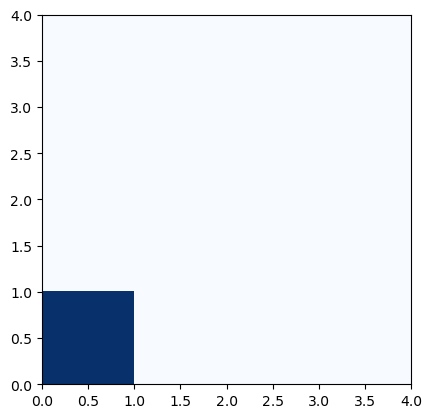

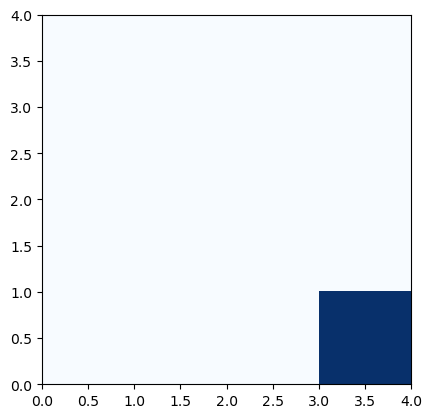

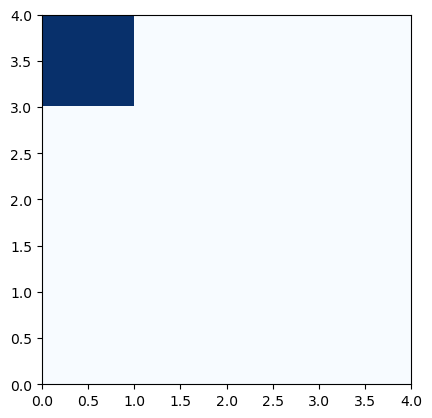

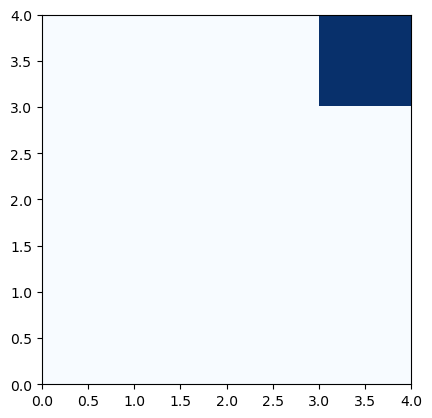

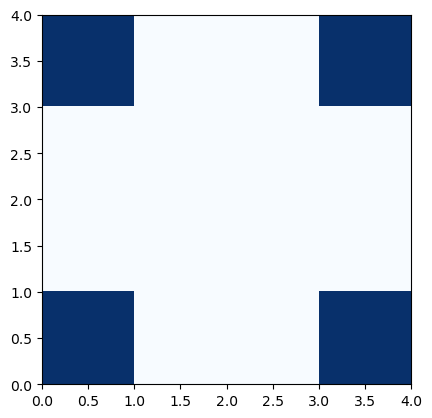

In [18]:
import plotgamma
li=GR.returnvertices()[-1]
plotgamma.overlap(li,PrunnedSpace)

#### $\chi^{-1}(|\square(D\check{G}_p)|)$

[[[0, 0], [0, 4]], [[0, 0], [4, 0]], [[0, 2], [0, 4]], [[2, 0], [4, 0]], [[0, 3], [1, 4]], [[3, 3], [4, 4]], [[0, 4], [4, 4]], [[2, 4], [4, 4]], [[4, 0], [4, 4]], [[3, 0], [4, 1]], [[4, 2], [4, 4]]]


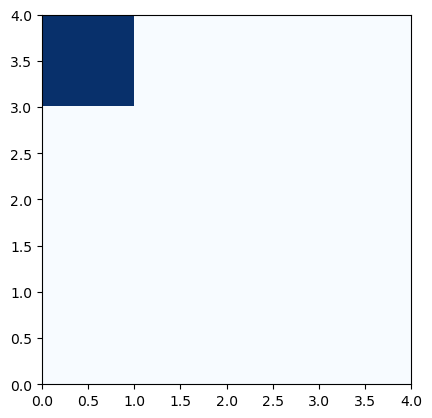

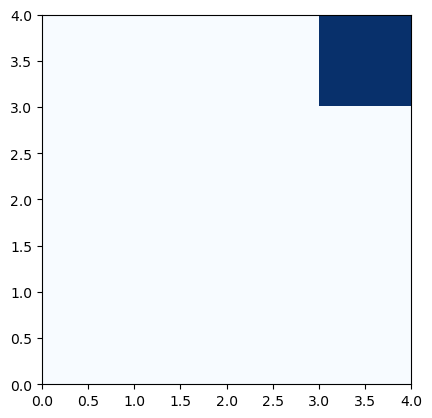

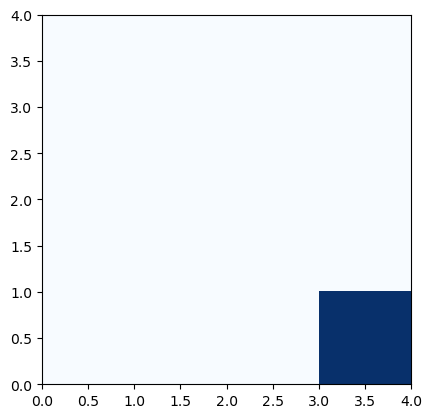

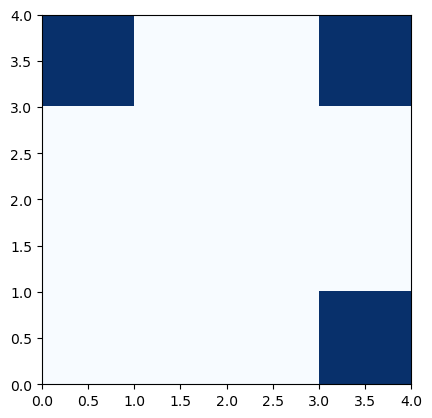

In [19]:
DbarV=copy.deepcopy(G.returnDFvertices())
PrunnedSpaceDG=GR.alg6(DbarV)
plotgamma.overlap(li,PrunnedSpaceDG)

#### $\chi^{-1}(|\square(U\check{G}_p)|)$

[[[4, 0], [4, 4]], [[0, 4], [4, 4]], [[0, 0], [0, 4]], [[0, 0], [0, 2]], [[2, 0], [2, 0]], [[0, 0], [1, 1]], [[0, 0], [2, 0]], [[2, 0], [4, 0]], [[3, 0], [4, 1]], [[0, 0], [4, 0]], [[0, 3], [1, 4]], [[0, 4], [2, 4]], [[2, 4], [2, 4]], [[4, 0], [4, 2]], [[4, 2], [4, 2]]]


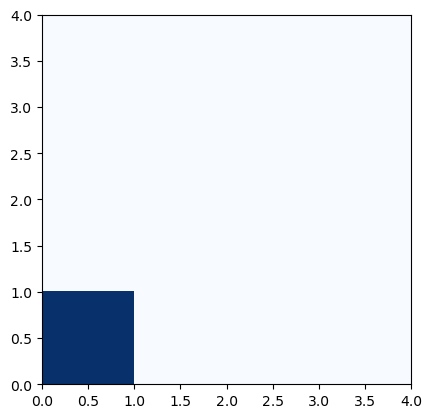

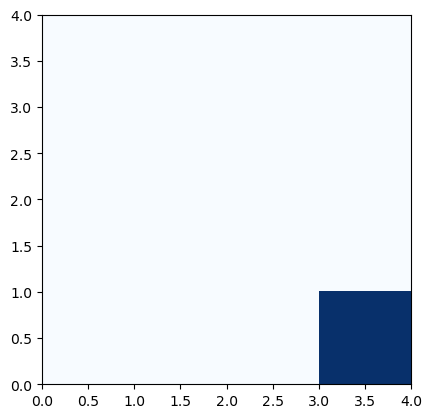

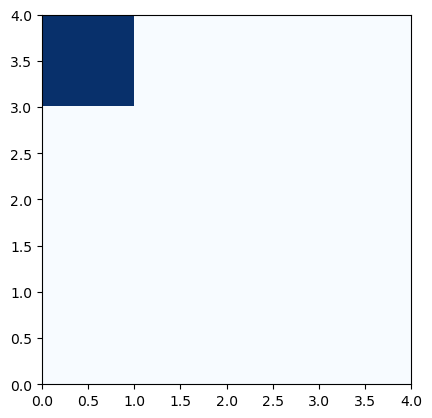

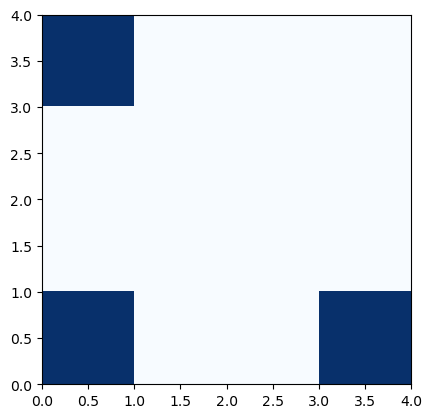

In [20]:
UbarV=copy.deepcopy(G.returnUFvertices())
PrunnedSpaceUG=GR.alg6(UbarV)
plotgamma.overlap(li,PrunnedSpaceUG)